# Assignment on Matplotlib

In Iris Dataset, plot a scatter plot differentiating each classifier with a boundary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
data = pd.read_csv("E:\\raj stuff\\ML stuff\\supervised learning\\datasets\\end to end data sets\\iris.csv")

In [3]:
data.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

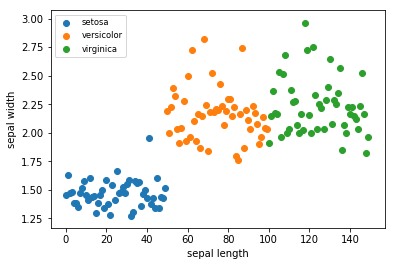

In [5]:
import matplotlib.pyplot as plt

ratio = data["Sepal.Length"]/data["Sepal.Width"]

for name, group in data.groupby("Species"):
    plt.scatter(group.index, ratio[group.index], label=name)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend(fontsize = "small")
plt.show()

# In wine quality dataset, plot a correlation matrix for all numerical variables and find out which columns are highly correlated to each other.

In [6]:
wine = pd.read_csv ('D:\\ML stuff\\datasets\\winequality\\winequality-white.csv',sep=";")

In [7]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)

In [8]:
correlation(wine,0.5)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

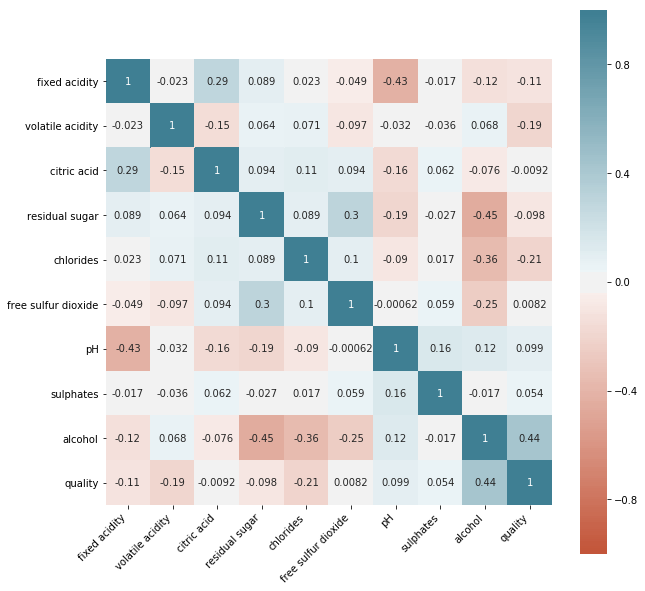

In [9]:
corr = wine.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True,annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');

# Plot subplots for categorical features in titanic dataset , consisting of rows = 3 and columns = 2 format.

In [10]:
titanic = pd.read_csv("titanic.csv")

In [11]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
tit = titanic.drop(["PassengerId","Name","Age","Ticket","Fare","Cabin"],axis=1)
tit.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S


C:\Users\Rajkumar\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Rajkumar\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Rajkumar\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  wa

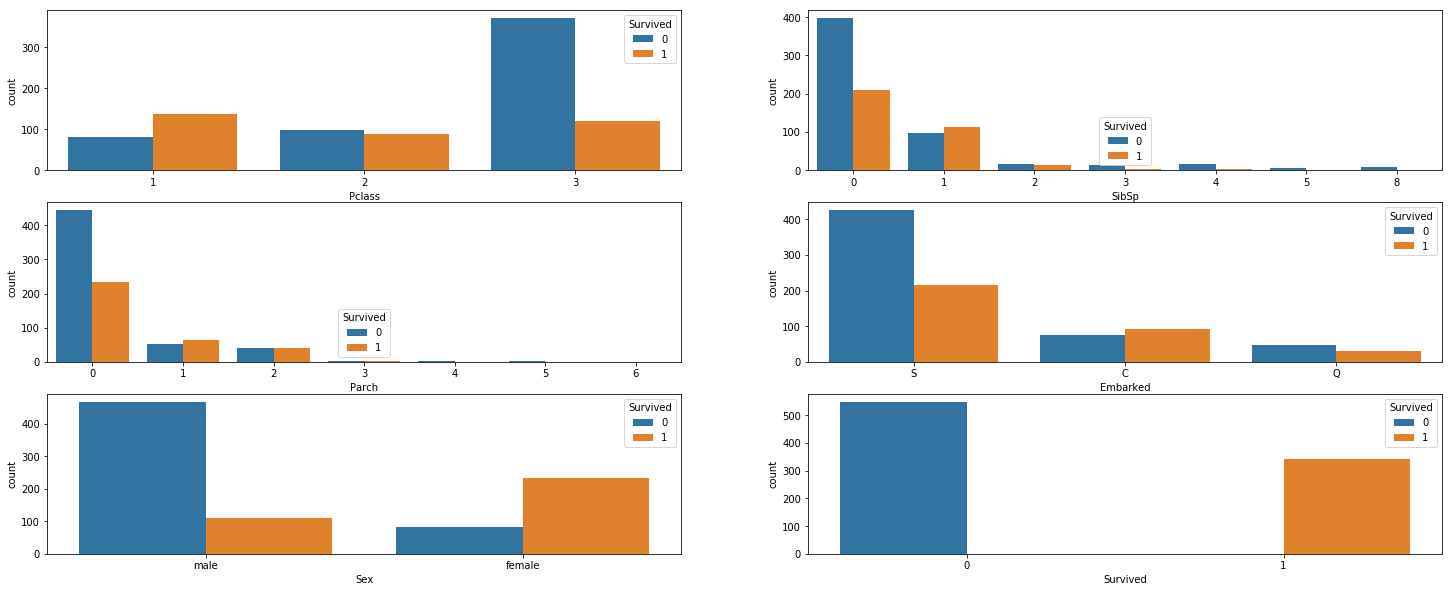

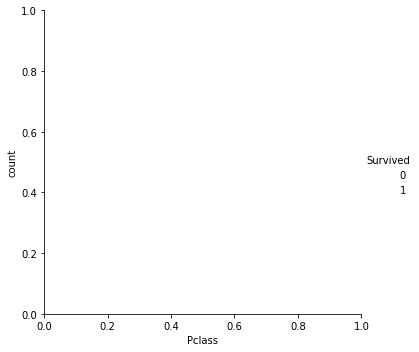

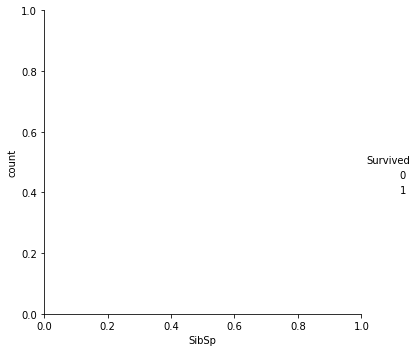

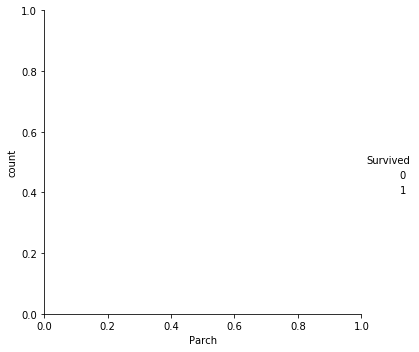

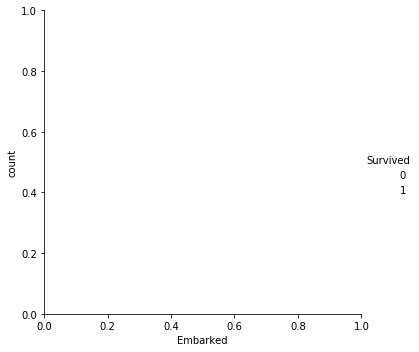

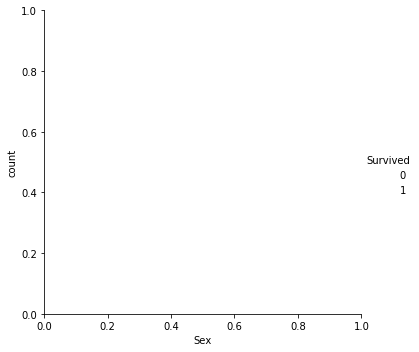

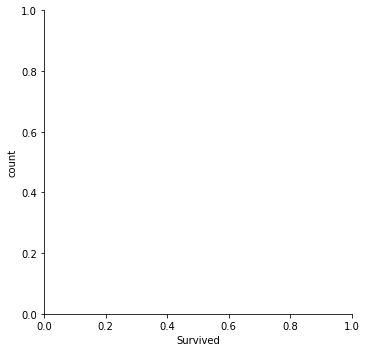

In [14]:
titanic_df = tit

fig, ((axis1,axis2),(axis3,axis4),(axis5,axis6)) = plt.subplots(3,2,figsize=(25,10))
sns.factorplot(x='Pclass',data=titanic_df,kind='count',hue='Survived',ax=axis1)
sns.factorplot(x='SibSp',data=titanic_df,kind='count',hue='Survived',ax=axis2)
sns.factorplot(x='Parch',data=titanic_df,kind='count',hue='Survived',ax=axis3)
sns.factorplot(x='Embarked',data=titanic_df,kind='count',hue='Survived',ax=axis4)
sns.factorplot(x='Sex',data=titanic_df,kind='count',hue='Survived',ax=axis5)
sns.factorplot(x='Survived',data=titanic_df,kind='count',hue='Survived',ax=axis6)


In the diabetes dataset, visualize the numerical variables using histogram and make use of subplots while plotting.

In [15]:
dia = pd.read_csv("E:\\raj stuff\\ML stuff\\supervised learning\\datasets\\end to end data sets\\diabetes.csv")

In [16]:
dia.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
dia.columns

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9'], dtype='object')

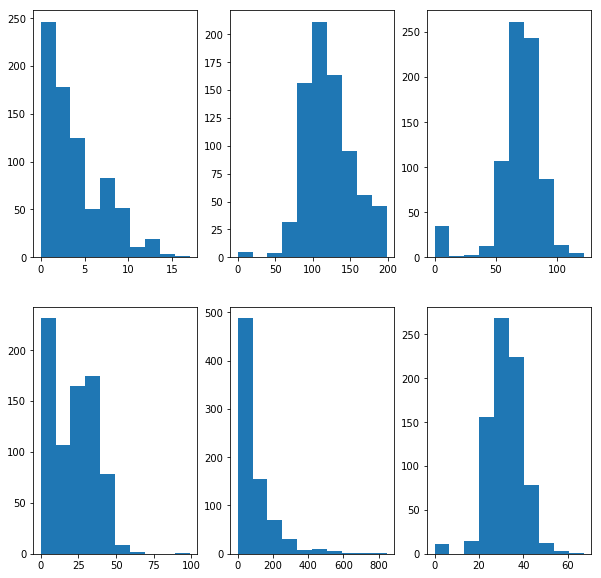

In [18]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)
ax6 = plt.subplot(236)
ax1.hist(dia.col1)
ax2.hist(dia.col2)
ax3.hist(dia.col3)
ax4.hist(dia.col4)
ax5.hist(dia.col5)
ax6.hist(dia.col6)
plt.show()

In the breast cancer dataset, visualize the malignant and benign diagnosis.

In [19]:
bc = pd.read_csv("E:\\raj stuff\\ML stuff\\supervised learning\\datasets\\end to end data sets\\breast-cancer-data.csv")

In [20]:
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
bc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

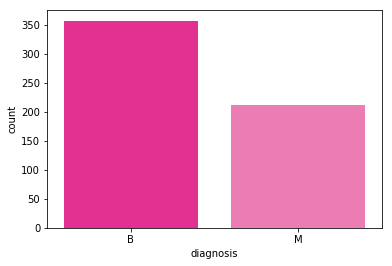

In [29]:
sns.countplot(bc['diagnosis'], label="Count", palette=sns.color_palette(['#FF1493', '#FF69B4']),
              order=pd.value_counts(bc['diagnosis']).iloc[:17].index)
plt.show()